### Naive Bayes

In [7]:
from collections import Counter
import pandas as pd

In [8]:
data = pd.read_csv("tennis.csv")
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [93]:
def createTables(data):
    out = Counter(data['play'].tolist())
    dic = {}
    c = data.columns.tolist()
    c.remove('play')
    for x in c:
        dic[x] = dict()
        values = Counter(data[x].tolist())
        for y in values:
            if y == 'windy':
                dic[x][y] = dict()
                dic[x][y]['yes'] = len(data.query("{} == {} and play == \"yes\"".format(x,y)))/out['yes']
                dic[x][y]['no'] = len(data.query("{} == {} and play == \"no\"".format(x,y)))/ out['no']
            else:
                dic[x][y] = dict()
                dic[x][y]['yes'] = len(data.query("{} == \"{}\" and play == \"yes\"".format(x,y)))/out['yes']
                dic[x][y]['no'] = len(data.query("{} == \"{}\" and play == \"no\"".format(x,y))) /out['no']
    dic['play'] = dict()
    dic['play']['yes']= out['yes']/(out['yes'] + out['no'])
    dic['play']['no']= out['no']/(out['yes'] + out['no'])
    return dic       
def predict(columns,dic,values):
    sumy = 1
    sumn = 1
    for x in range(len(columns)-2):
        sumy *= dic[columns[x]][values[x]]['yes'] 
        sumn *= dic[columns[x]][values[x]]['no']
    sumy *=  dic['play']['yes']
    sumn *=  dic['play']['no']  
    print("probablity of yes = ",sumy/(sumy+sumn))
    print("probablity of no = ",sumn/(sumn+sumy))   
    print("Total = ",sumy/(sumy+sumn) +sumn/(sumn+sumy) )         
    return "Yes" if sumy/(sumy+sumn) > sumn/(sumn+sumy) else "NO"   

In [94]:
table = createTables(data)
p = ['rainy','mild', 'normal', 'True']
predict(data.columns,table,p)

probablity of yes =  0.847457627118644
probablity of no =  0.152542372881356
Total =  1.0


'Yes'

In [95]:
p = ['rainy','mild', 'normal', 'True']
predict(data.columns,table,p)

probablity of yes =  0.847457627118644
probablity of no =  0.152542372881356
Total =  1.0


'Yes'

In [96]:
p = ['overcast','cool', 'normal', 'True']
predict(data.columns,table,p)

probablity of yes =  1.0
probablity of no =  0.0
Total =  1.0


'Yes'

In [97]:
p = ['sunny','hot', 'high', 'True']
predict(data.columns,table,p)

probablity of yes =  0.1336898395721925
probablity of no =  0.8663101604278075
Total =  1.0


'NO'

### Decision Tree

In [ ]:
import math
def Entropy(data,attribute=-1):
    totalValues = data.shape[0]
    if attribute == -1:
        values = Counter(data['play'].tolist())
        ans = 0
        for x in values.values():
            ans -= (x/totalValues) * math.log(x/totalValues,2)
        return ans
    else:
        values = Counter(data[attribute].tolist())
        lst = []
        for x,y in values.items():
            filter = data[data[attribute] == x]
            filterdata = Counter(filter['play'].tolist())
            ans = 0
            for m in filterdata.values():
                ans -= (m/y) * math.log(m/y,2)
            lst.append((x,y,ans))
        ans = 0
        #print(lst)
        for x,y,z in lst:
            ans -= (y/totalValues) * z
        return ans
def Gain(data,attribute):
    return Entropy(data) + Entropy(data,attribute)
def FindRoot(data,classification):
    attributes = data.columns.tolist()
    attributes.remove(classification)
    lst = []
    for x in attributes:
        lst.append((x,Gain(data,x)))
    lst.sort(key = lambda x:x[1],reverse = True)
    return lst[0]

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

input = data.drop('play',axis='columns')
output = data['play']

outlook = LabelEncoder()
temp = LabelEncoder()
humidity = LabelEncoder()
wind = LabelEncoder()
play = LabelEncoder()

input['outlook'] = outlook.fit_transform(input['outlook'])
input['temp'] = temp.fit_transform(input['temp'])
input['humidity'] = humidity.fit_transform(input['humidity'])
input['windy'] = wind.fit_transform(input['windy'])

output = play.fit_transform(output)

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(input, output)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=input.columns,filled=True)

### Breadth First Search

In [3]:
class Node:
    def __init__(self,parent,mat,depth,size,pos) -> None:
        self.size = size
        self.mat = mat
        self.depth = depth
        self.parent = parent
        self.pos = pos
    def equals(self,mat):
        if self.mat == mat.mat:
            return True
        return False
    def copy(self):
        return Node(self,[[x for x in y] for y in self.mat],self.depth+1,self.size,self.pos)
    def playleft(self):
        if self.pos[1] > 0:
            return True
        return False
    def playright(self):
        if self.pos[1] < self.size-1:
            return True
        return False
    def playdown(self):
        if self.pos[0] < self.size-1:
            return True
        return False
    def playup(self):
        if self.pos[0] > 0:
            return True
        return False
    def swap(self,pos):
        t = self.mat[pos[0]][pos[1]]
        self.mat[pos[0]][pos[1]] = self.mat[self.pos[0]][self.pos[1]]
        self.mat[self.pos[0]][self.pos[1]] = t
class Queue:
    def __init__(self) -> None:
        self.arr = []
    def enque(self,e):
        self.arr.append(e)
    def deque(self):
        return self.arr.pop(0)
    def isEmpty(self):
        return self.arr
    def Contains(self,e):
        for x in self.arr:
            if x.equals(e):
                return True
        return False            
    
def BFS(initial,goal):
    queue = Queue()
    v = Queue()
    queue.enque(initial)
    while queue.isEmpty():
        state = queue.deque()
        print(state.depth)
        v.enque(state)
        if state.equals(goal):
            return state
        if state.playleft():
            cpy = state.copy()
            cpy.swap((cpy.pos[0],cpy.pos[1]-1))
            cpy.pos = (cpy.pos[0],cpy.pos[1]-1)
            if not queue.Contains(cpy) and not v.Contains(cpy):
                queue.enque(cpy)
        if state.playright():
            cpy = state.copy()
            cpy.swap((cpy.pos[0],cpy.pos[1]+1))
            cpy.pos = (cpy.pos[0],cpy.pos[1]+1)
            if not queue.Contains(cpy) and not v.Contains(cpy):
                queue.enque(cpy)
        if state.playup():
            cpy = state.copy()
            cpy.swap((cpy.pos[0]-1,cpy.pos[1]))
            cpy.pos = (cpy.pos[0]-1,cpy.pos[1])
            if not queue.Contains(cpy) and not v.Contains(cpy):
                queue.enque(cpy)
        if state.playdown():
            cpy = state.copy()
            cpy.swap((cpy.pos[0]+1,cpy.pos[1]))
            cpy.pos = (cpy.pos[0]+1,cpy.pos[1])
            if not queue.Contains(cpy) and not v.Contains(cpy):
                queue.enque(cpy)           
                
i = Node(None,[[1,6,-1],[2,4,3],[7,8,5]],0,3,(0,2))
g = Node(None,[[1,6,3],[2,4,5],[7,-1,8]],0,3,(2,1))
n = BFS(i,g)
print(n.depth)    

0
1
1
2
2
2
2
3
3
3
3
3
3
3
3
3


### Depth First Search

In [2]:
class Node:
    def __init__(self,parent,mat,depth,size,pos) -> None:
        self.size = size
        self.mat = mat
        self.depth = depth
        self.parent = parent
        self.pos = pos
    def equals(self,mat):
        if self.mat == mat.mat:
            return True
        return False
    def copy(self):
        return Node(self,[[x for x in y] for y in self.mat],self.depth+1,self.size,self.pos)
    def playleft(self):
        if self.pos[1] > 0:
            return True
        return False
    def playright(self):
        if self.pos[1] < self.size-1:
            return True
        return False
    def playdown(self):
        if self.pos[0] < self.size-1:
            return True
        return False
    def playup(self):
        if self.pos[0] > 0:
            return True
        return False
    def swap(self,pos):
        t = self.mat[pos[0]][pos[1]]
        self.mat[pos[0]][pos[1]] = self.mat[self.pos[0]][self.pos[1]]
        self.mat[self.pos[0]][self.pos[1]] = t
class Stack:
    def __init__(self) -> None:
        self.arr = []
        self.top = -1
    def enque(self,e):
        self.top+=1
        self.arr.append(e)
    def deque(self):
        self.top -= 1
        return self.arr.pop(self.top+1)
    def isEmpty(self):
        return self.arr
    def Contains(self,e):
        for x in self.arr:
            if x.equals(e):
                return True
        return False            
class Queue:
    def __init__(self) -> None:
        self.arr = []
    def enque(self,e):
        self.arr.append(e)
    def deque(self):
        return self.arr.pop(0)
    def isEmpty(self):
        return self.arr
    def Contains(self,e):
        for x in self.arr:
            if x.equals(e):
                return True
        return False            
        
def DFS(initial,goal):
    queue = Stack()
    v = Queue()
    queue.enque(initial)
    while queue.isEmpty():
        state = queue.deque()
        print(state.depth)
        v.enque(state)
        if state.equals(goal):
            return state
        if state.playleft():
            cpy = state.copy()
            cpy.swap((cpy.pos[0],cpy.pos[1]-1))
            cpy.pos = (cpy.pos[0],cpy.pos[1]-1)
            if not queue.Contains(cpy) and not v.Contains(cpy):
                queue.enque(cpy)
        if state.playright():
            cpy = state.copy()
            cpy.swap((cpy.pos[0],cpy.pos[1]+1))
            cpy.pos = (cpy.pos[0],cpy.pos[1]+1)
            if not queue.Contains(cpy) and not v.Contains(cpy):
                queue.enque(cpy)
        if state.playup():
            cpy = state.copy()
            cpy.swap((cpy.pos[0]-1,cpy.pos[1]))
            cpy.pos = (cpy.pos[0]-1,cpy.pos[1])
            if not queue.Contains(cpy) and not v.Contains(cpy):
                queue.enque(cpy)
        if state.playdown():
            cpy = state.copy()
            cpy.swap((cpy.pos[0]+1,cpy.pos[1]))
            cpy.pos = (cpy.pos[0]+1,cpy.pos[1])
            if not queue.Contains(cpy) and not v.Contains(cpy):
                queue.enque(cpy)           
                
i = Node(None,[[1,6,-1],[2,4,3],[7,8,5]],0,3,(0,2))
g = Node(None,[[1,6,3],[2,4,5],[7,-1,8]],0,3,(2,1))
n = DFS(i,g)
print(n.depth)    

0
1
2
3
3


### Best First, A* has priority queue

In [6]:
class PQueue:
    def __init__(self) -> None:
        self.arr = []
    def enque(self,e):
        for x in range(len(self.arr)):
            if self.arr[x] >= e:
                self.arr.insert(x,e)
                return
        self.arr.append(e)    
    def deque(self):
        return self.arr.pop(0)
    def isEmpty(self):
        return self.arr
    def Contains(self,e):
        for x in self.arr:
            if x.equals(e):
                return True
        return False  
pq = PQueue()
pq.enque(10)
pq.enque(100)
pq.enque(60)
pq.enque(300)
print(pq.arr)  

[10, 60, 100, 300]


### TicTacToe MinMax

In [ ]:
class Board:
    def __init__(self,parent,mat,turn):
        self.depth = 0
        self.parent = parent
        self.children = []
        self.Leaf = False
        self.score = 0
        self.mat = mat
        self.turn = turn
        self.PossiblePlaces = self.CreateSet(self.mat)
        self.movesLeft = len(self.PossiblePlaces)
        w = self.CheckWin()
        if w == 1 or w == -1:
            self.score = w
            self.Leaf = True
    def CreateSet(self,mat):
        possiblePlace = set()
        for x in range(3):
            for y in range(3):
                if mat[x][y] == '':
                    possiblePlace.add((x,y))
        return possiblePlace
    def printMat(self):
        for x in range(3):
            for y in range(3):
                if self.mat[x][y] == '':
                    print("_",end="  ")
                else:
                    print(self.mat[x][y],end="  ")
            print()
    def printPossiblePlaces(self):
        print(self.PossiblePlaces)
    def ChangeTurn(self):
        if self.turn == 'X':
            self.turn = 'O'
        else:
            self.turn = 'X'
    def CheckWin(self):
        ## row
        if self.mat[0][0] == self.mat[0][1] and self.mat[0][1] == self.mat[0][2] and self.mat[0][0] != '':
            if self.mat[0][0] == 'X':
                return 1
            else:
                return -1
        if self.mat[1][0] == self.mat[1][1] and self.mat[1][1] == self.mat[1][2] and self.mat[1][0] != '':
            if self.mat[1][0] == 'X':
                return 1
            else:
                return -1
        if self.mat[2][0] == self.mat[2][1] and self.mat[2][1] == self.mat[2][2] and self.mat[2][0] != '':
            if self.mat[2][0] == 'X':
                return 1
            else:
                return -1
        ## column
        if self.mat[0][0] == self.mat[1][0] and self.mat[1][0] == self.mat[2][0] and self.mat[0][0] != '':
            if self.mat[0][0] == 'X':
                return 1
            else:
                return -1
        if self.mat[0][1] == self.mat[1][1] and self.mat[1][1] == self.mat[2][1] and self.mat[0][1] != '':
            if self.mat[0][1] == 'X':
                return 1
            else:
                return -1
        if self.mat[0][2] == self.mat[1][2] and self.mat[1][2] == self.mat[2][2] and self.mat[0][2] != '':
            if self.mat[0][2] == 'X':
                return 1
            else:
                return -1
        ## diagonals
        if self.mat[0][0] == self.mat[1][1] and self.mat[1][1] == self.mat[2][2] and self.mat[0][0] != '':
            if self.mat[0][0] == 'X':
                return 1
            else:
                return -1
        if self.mat[0][2] == self.mat[1][1] and self.mat[1][1] == self.mat[2][0] and self.mat[0][2] != '':
            if self.mat[0][2] == 'X':
                return 1
            else:
                return -1
        else:
            return 0
    def PlayPossible(self):
        lst = []
        for x in self.PossiblePlaces:
            m = [[x for x in y] for y in self.mat]
            t = ''
            if self.turn == 'X':
                m[x[0]][x[1]] = 'O'
                t = 'O'
            else:
                m[x[0]][x[1]] = 'X'
                t = 'X'
            n = Board(self,m,t)
            n.depth = self.depth + 1
            lst.append(n)
        self.children= lst
        return lst

class Queue:
    def __init__(self):
        self.arr = []
        self.len = 0
    def append(self,n):
        self.arr.append(n)
        self.len += 1
    def pop(self)-> Board:
        n = self.arr.pop(0)
        self.len -= 1
        return n
    def hasElements(self):
        if self.len >= 1:
            return True
        else:
            return False
    def inQueue(self,node):
        for x in self.arr:
            if x.isEqual(node):
                return True
        return False
    

def BuildTree(i):
    nxtMoves = i.PlayPossible()
    score = []
    s = 0
    for x in nxtMoves:
        if x.Leaf == False:
            score.append(BuildTree(x))
        else:
            score.append(x.score)
    if len(score) == 0:
        return 0
    if i.turn == 'O':
        s = max(score)
    else:
        s = min(score)
    i.score = s
    return s
def BFS(i):
    queue = Queue()
    queue.append(i)
    while queue.hasElements():
        state = queue.pop()
        state.printMat()
        print("Depth = ",state.depth," Score = ",state.score," Leaf = ",state.Leaf)
        print("-----------------------")
        for x in state.children:
            queue.append(x)

i = Board(None,[['X','O','X'],['','X',''],['','','O']],'O')
i.printMat()
nxtMoves = i.PlayPossible()
for x in nxtMoves:
    print("------------")
    x.printMat()
print("\nScore = ",i.score)

### Prolog

In [ ]:
Problem 1

country(nono).
country(america).
american(west).
enemy(nano,america).
sell(west,missile,nano).
criminal(X) :- american(X),sell(X,M,Y),enemy(Y,america).


probelem 2

male(ram).
male(lakshman).
male(bharat).
male(shatrugan).
male(dashrath).
female(sita).
female(kaushallya).
parent(dashrath, ram).
parent(dashrath, lakshman).
parent(dashrath, bharat).
parent(dashrath, shatrugan).
parent(kaushallya, ram).
parent(kaushallya, lakshman).
parent(kaushallya, bharat).
parent(kaushallya, shatrugan).
wife(kaushallya,dashrath).
wife(sita,ram).
% Defining Rules
father(X, Y) :- parent(X, Y), male(X).
mother(X, Y) :- parent(X, Y), female(X).
father_in_law(X, Y) :- father(X, Z), wife(Y, Z).
mother_in_law(X, Y) :- mother(X, Z), wife(Y, Z).
brother(X,Y) :- father(Z,X), father(Z,Y),male(X),male(Y).
brother_in_law(X,Y) :- female(Y), wife(Y,Z) , brother(Z,X).

### Perceptron Learning

In [21]:
# Or gate
import pandas as pd

data = {
    "x1":[1,1,-1,-1],
    "x2":[1,-1,1,-1],
    "out":[1,1,1,-1]
}
know = pd.DataFrame(data)
w = [0.1,0.5,-0.3]
def Train(data,w,itr):
    for x in range(itr):
        net = data.iloc[x][0]*w[0] + data.iloc[x][1]*w[1] + data.iloc[x][2]*w[2]
        print(net)
        o = 1 if net > 0 else -1
        w0 = data.iloc[x][2] - o
        nw = [data.iloc[x][0]*w0 , data.iloc[x][1]*w0 , data.iloc[x][2]*w0]
        print(nw)
        for x in range(len(w)):
            w[x] += nw[x]
        print(w)    
    return w         

Train(know,w,4)

0.3
[0, 0, 0]
[0.1, 0.5, -0.3]
-0.7
[2, -2, 2]
[2.1, -1.5, 1.7]
-1.9000000000000001
[-2, 2, 2]
[0.10000000000000009, 0.5, 3.7]
-4.300000000000001
[0, 0, 0]
[0.10000000000000009, 0.5, 3.7]


[0.10000000000000009, 0.5, 3.7]

### KNN

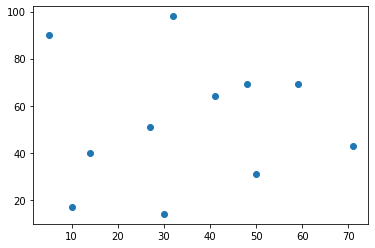

[(10, 17, 0.0), (30, 14, 20.223748416156685), (14, 40, 23.345235059857504)]

In [34]:
import math
import  numpy as np
import matplotlib.pyplot as plt

npr1 = np.array([10,5,27,30,41,71,48,32,50,14,59])
npr2 = np.array([17,90,51,14,64,43,69,98,31,40,69])
coor = []
for x in range(len(npr1)):
    coor.append((npr1[x],npr2[x]))
fig = plt.plot(npr1,npr2,'o')
plt.show()
def FindKNearN(data,point,k):
    l = []
    for i in range(len(data)):
        l.append((data[i][0],data[i][1],math.dist(data[i],point)))
    l.sort(key= lambda x:x[2])
    return l[:k:]
FindKNearN(coor,(10,17),3)    